# Introduction to Numerical Techniques

## 1) Numerical Differentiation Breakout : Different Differences

There are multiple possible ways to calculate the derivative using finite differences:

Left:

$$f'(x) = \frac{f(x+h) - f(x)}{h}$$

Center:

$$f'(x) = \frac{f(x+h/2) - f(x-h/2)}{h}$$

Right:

$$f'(x) = \frac{f(x) - f(x-h)}{h}$$

Code up each of these and plot the accuracy vs step size h. Do this for both $f(x) = -sin(x)exp(-x)$ as well as $f(x) = x^2-x$.

In [44]:
import numpy as np

In [45]:
def func_one(x):
    return -np.sin(x) * np.e ** (-x)
def func_two(x) : 
    return x ** 2 - x

In [46]:
def derivative(method, func, x, h = 0.01):
    if(method == 'left'):
        return (func(x+h) - func(x)) / h
    elif(method == 'center'):
        return (func(x+h/2) - func(x-h/2)) / h
    elif(method == 'right'):
        return (func(x) - func(x-h)) / h
    else:
        print("method error")
        exit()

In [47]:
h = np.logspace(-16, 1, 100)
method = {0 : 'left', 1 : 'center', 2 : 'right'}
color = {0 : 'r:', 1 : 'b:', 2 : 'g:'}

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

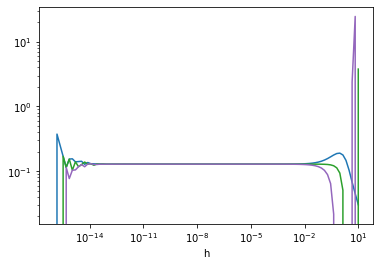

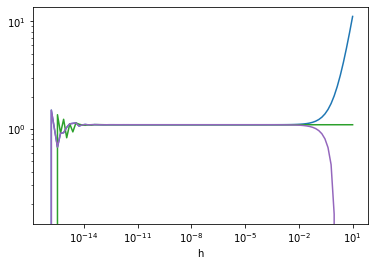

<Figure size 432x288 with 0 Axes>

In [51]:
%pylab inline
for n,_ in enumerate(method):
    derivatives = derivative(method[n], func_one, np.pi / 3, h)
    plt.loglog(h,derivatives, '', color[n])
plt.xlabel(r'h')
plt.figure()
for n,_ in enumerate(method):
    derivatives = derivative(method[n], func_two, np.pi / 3, h)
    plt.loglog(h,derivatives, '', color[n])
plt.xlabel(r'h')
plt.figure()

## 2) Numerical Differentiation Breakout : Second Derivative

a) Use wolfram alpha to calculate the second derivative of $f(x) = -sin(x)exp(-x)$.

b) Write a function to calculate the second derivative of a function and compare it to the analytical result. 

(Hint: $f''(x) = \frac{\frac{f(x+h)-f(x)}{h} - \frac{f(x)-f(x-h)}{h} }{h}$ )

c) In ./data/freefall.txt there is data from an experiment with a dropped weight. Calculate the force by measuring the acceleration (i.e. $F = m \frac{d^2x}{dt^2}$)

In [52]:
def second_der(func, x, h = 0.01):
    return (derivative('left', func, x, h) - derivative('right', func, x, h)) / h

In [53]:
print(second_der(func_one, 1, 0.0001))

0.397532218255


## 3) Numerical Integration Breakout: Trap Integration
    
Below is the code for trapezoidal integration. Compare the performance of this vs the rectangular integration in class. If we want to get within .1 percent of the true integral how many steps of Trap_int will we need vs rectangular int?

In [56]:
def rec_int(f, a, b, N=100):
    n = np.linspace(a, b, N)
    dx = n[1] - n[0]
    return sum(f(n)) * dx

In [57]:
def trap_int(f, a, b, N=10):
    # Define x-values
    x = np.linspace(a, b, N+1)

    # Get y-values
    y = f(x)

    # Define slice width
    h = (b-a)/float(N)

    # approximate integral
    I = h * (0.5*y[0] + 0.5*y[-1] + sum(y[1:-1]))

    return I

In [88]:
# n = linspace(10000, 20000, 10001)
n_rec, n_trap = 1000, 10
while(True):
    if(abs(rec_int(func_one, 0, 1, n_rec) + 0.24584) < 0.00001):
        break
    n_rec = n_rec + 1
while(True):
    if(abs(trap_int(func_one, 0, 1, n_trap) + 0.24584) < 0.00001):
        break
    n_trap = n_trap + 1
    
print(n_rec, n_trap)
print(trap_int(func_one, 0, 1, 115))


11913 115
-0.245830007677


In [110]:
n = np.arange(20, 20000, 1)
result_rec = [abs(rec_int(func_one, 0, 1, i)) for i in n]
result_trap = [abs(trap_int(func_one, 0, 1, i)) for i in n] 

<Figure size 432x288 with 0 Axes>

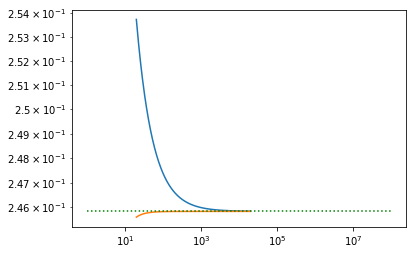

<Figure size 432x288 with 0 Axes>

In [111]:
plt.loglog(n ,result_rec)
plt.loglog(n, result_trap)
plt.loglog([1,10**8],[0.2458370070002,0.2458370070002], "g:") 
plt.figure()